# Web Scraping Stock Data

In [1]:
#import the basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
#allow to use own functions from functions.py
import os
os.getcwd()

'C:\\Users\\Stijn\\Documents\\GitHub\\stock-scraping'

In [3]:
ticker = "ASML.AS"

In [ ]:
#TO DO:

In [ ]:
#summary
url_summary = "https://finance.yahoo.com/quote/"+ ticker + "?p=" + ticker + "&.tsrc=fin-srch"
url_summary

In [ ]:
#analysis by analysts
url_analists = "https://finance.yahoo.com/quote/" + ticker + "/analysis?p=" + ticker

In [ ]:
#sustainability
url_sust = "https://finance.yahoo.com/quote/" + ticker + "/sustainability?p=" + ticker

## Financials

In [4]:
from functions import income_statement

In [5]:
cf_abi=income_statement('ABI.BR', 'cash-flow')

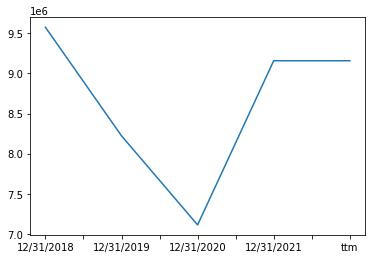

In [6]:
cf_abi['Free Cash Flow'].plot()
plt.show()

## Statistics

In [7]:
from functions import statistics

In [8]:
stat_googl = statistics('GOOGL')

In [9]:
stat_googl.head()

,parameter,value
0,Market Cap (intraday),1.44T
1,Enterprise Value,1.33T
2,Trailing P/E,19.71
3,Forward P/E,19.19
4,PEG Ratio (5 yr expected),0.77


## Historical Data

In [10]:
from functions import hist_stock_price

In [11]:
ASML_sp = hist_stock_price('ASML.AS')

In [12]:
div_date = ASML_sp.loc[ASML_sp.Open == 0, 'Date'] #get the date of dividend
div_date_index = div_date.index #get the index of the dividend line
div_value = ASML_sp.iloc[div_date_index-2, 5] #get the value at closing of the dividend day

In [13]:
ASML_sp = ASML_sp.drop(ASML_sp[ASML_sp.Open == 0].index) #remove dividend line(s)

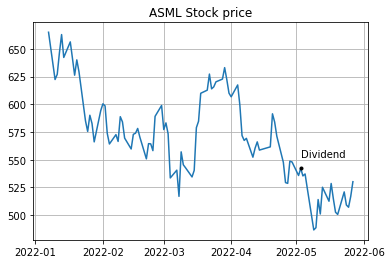

In [14]:
plt.plot('Date', 'Close*', data=ASML_sp)
plt.grid()
plt.title("ASML Stock price")
plt.annotate("Dividend", (div_date, div_value+10))
plt.plot(div_date, div_value, '.', color='black')
plt.show()